<a href="https://colab.research.google.com/github/nagwaelmobark/educational-reviews-imbalance-study/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-08-01 11:19:53--  https://raw.githubusercontent.com/nagwaelmobark/educational-reviews-imbalance-study/main/data/raw/reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16763599 (16M) [application/octet-stream]
Saving to: ‘reviews.csv’

reviews.csv         100%[===================>]  15.99M  99.6MB/s    in 0.2s    

2025-08-01 11:19:53 (99.6 MB/s) - ‘reviews.csv’ saved [16763599/16763599]

🎯 Educational Reviews Imbalance Study
📊 Data Exploration and Analysis

1️⃣ LOADING DATA...
✅ Data loaded successfully!
📊 Dataset shape: (107018, 3)
🔹 Rows: 107,018
🔹 Columns: 3

📋 FIRST 5 ROWS:
   Id                                             Review  Label
0   0                               good and interesting      5
1   1  This class is very helpful to me

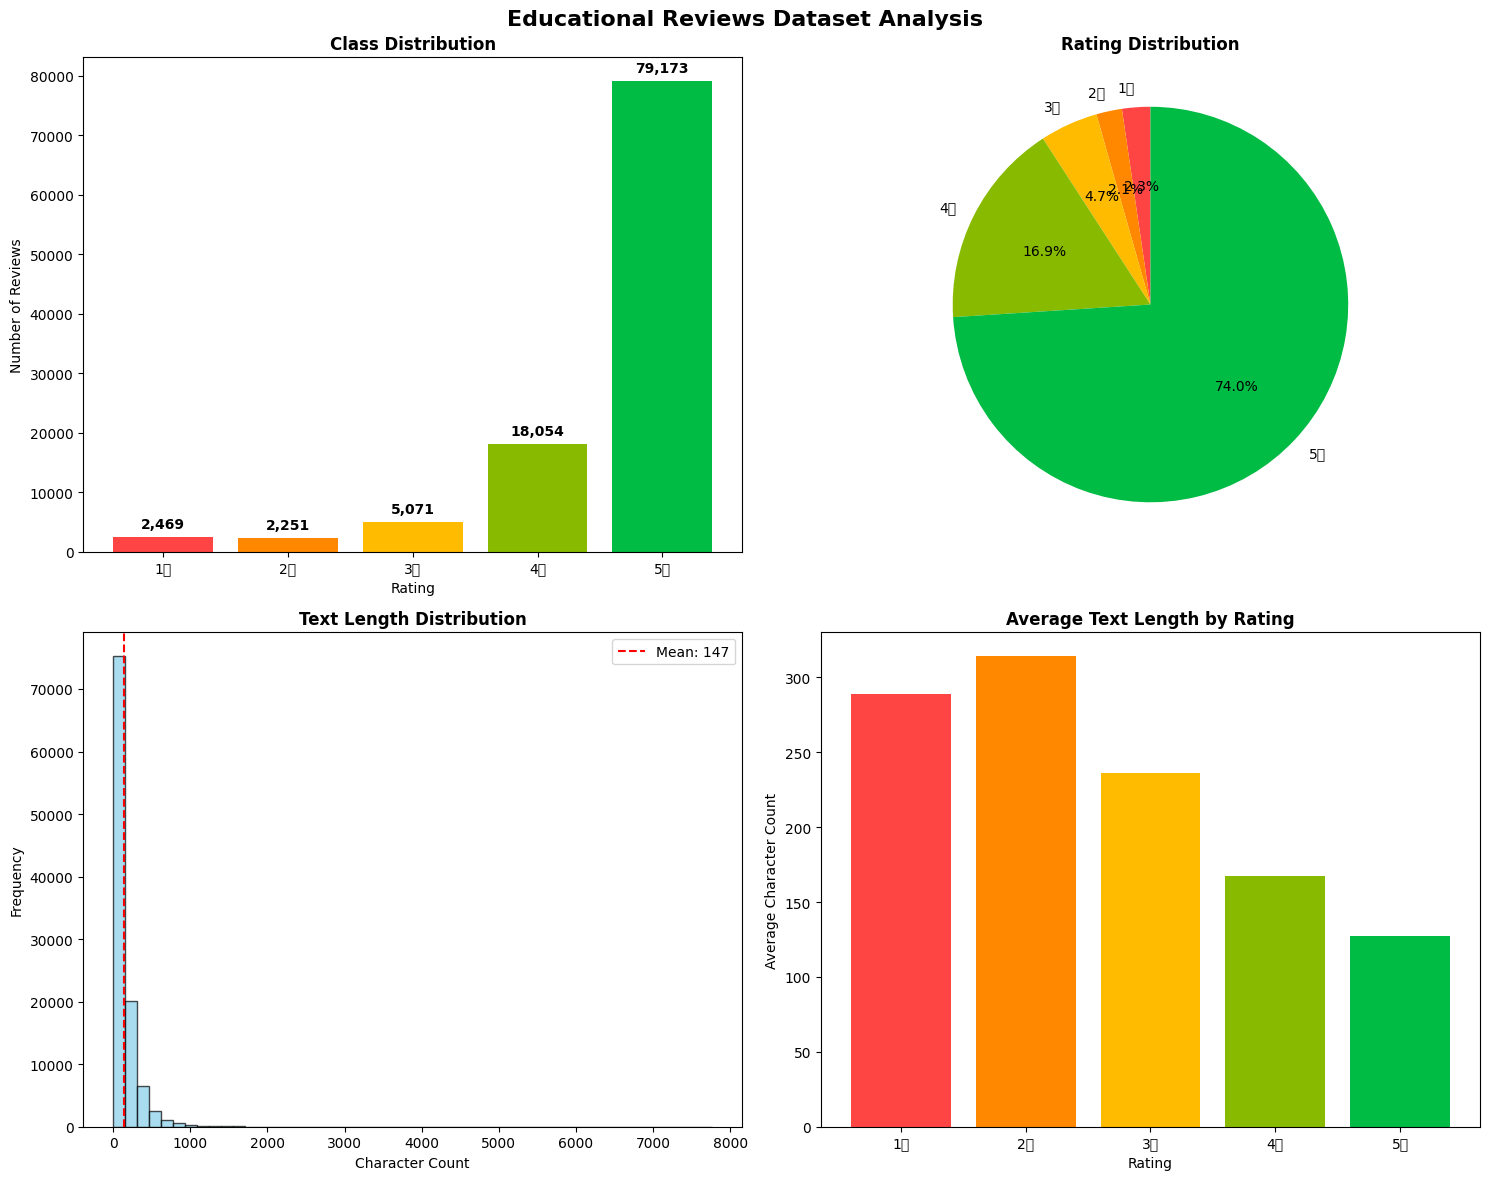


6️⃣ SUMMARY:
😊 Positive reviews (4-5⭐): 97,227 (90.9%)
😐 Neutral reviews (3⭐): 5,071 (4.7%)
😞 Negative reviews (1-2⭐): 4,720 (4.4%)

⚠️ Challenge: 20.6:1 positive to negative ratio!

🚀 NEXT: We need imbalance techniques to handle this!


In [1]:
# Install required packages
!pip install imbalanced-learn

# Download the dataset from GitHub
!wget https://raw.githubusercontent.com/nagwaelmobark/educational-reviews-imbalance-study/main/data/raw/reviews.csv

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("🎯 Educational Reviews Imbalance Study")
print("=" * 50)
print("📊 Data Exploration and Analysis")
print("=" * 50)

# Load data
print("\n1️⃣ LOADING DATA...")
df = pd.read_csv('reviews.csv')
print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"🔹 Rows: {df.shape[0]:,}")
print(f"🔹 Columns: {df.shape[1]:,}")

# Show first few rows
print("\n📋 FIRST 5 ROWS:")
print(df.head())

# Basic info
print(f"\n📋 DATASET INFO:")
print(df.info())

# Check columns
print(f"\n📋 COLUMNS:")
print(df.columns.tolist())

# Check for missing values
print(f"\n🔍 MISSING VALUES:")
missing_vals = df.isnull().sum()
print(missing_vals)

# Class distribution
print(f"\n2️⃣ CLASS DISTRIBUTION:")
print("=" * 30)

label_counts = df['Label'].value_counts().sort_index()
total_samples = len(df)

print("📊 Rating Distribution:")
for label in sorted(df['Label'].unique()):
    count = label_counts[label]
    percentage = (count / total_samples) * 100
    stars = "⭐" * label
    print(f"{stars} ({label}): {count:,} samples ({percentage:.2f}%)")

# Calculate imbalance ratio
max_class = label_counts.max()
min_class = label_counts.min()
imbalance_ratio = max_class / min_class
print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.1f}:1")

# Text analysis
print(f"\n3️⃣ TEXT ANALYSIS:")
print("=" * 25)

df['text_length'] = df['Review'].astype(str).str.len()
df['word_count'] = df['Review'].astype(str).str.split().str.len()

print(f"Average text length: {df['text_length'].mean():.1f} characters")
print(f"Average word count: {df['word_count'].mean():.1f} words")
print(f"Shortest review: {df['text_length'].min()} characters")
print(f"Longest review: {df['text_length'].max()} characters")

# Sample reviews
print(f"\n4️⃣ SAMPLE REVIEWS:")
print("=" * 25)
for rating in [1, 2, 3, 4, 5]:
    print(f"\n⭐" * rating + f" RATING {rating} EXAMPLE:")
    sample = df[df['Label'] == rating]['Review'].iloc[0]
    display_text = sample[:150] + "..." if len(sample) > 150 else sample
    print(f"'{display_text}'")

# Create visualizations
print(f"\n5️⃣ CREATING VISUALIZATIONS...")
print("=" * 30)

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Educational Reviews Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Class Distribution
ax1 = axes[0, 0]
bars = ax1.bar(label_counts.index, label_counts.values,
               color=['#ff4444', '#ff8800', '#ffbb00', '#88bb00', '#00bb44'])
ax1.set_title('Class Distribution', fontweight='bold')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Number of Reviews')
ax1.set_xticks(range(1, 6))
ax1.set_xticklabels([f'{i}⭐' for i in range(1, 6)])

# Add labels on bars
for bar, count in zip(bars, label_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 2. Pie Chart
ax2 = axes[0, 1]
colors = ['#ff4444', '#ff8800', '#ffbb00', '#88bb00', '#00bb44']
wedges, texts, autotexts = ax2.pie(label_counts.values, labels=[f'{i}⭐' for i in range(1, 6)],
                                  autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Rating Distribution', fontweight='bold')

# 3. Text Length Distribution
ax3 = axes[1, 0]
ax3.hist(df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax3.set_title('Text Length Distribution', fontweight='bold')
ax3.set_xlabel('Character Count')
ax3.set_ylabel('Frequency')
ax3.axvline(df['text_length'].mean(), color='red', linestyle='--',
           label=f'Mean: {df["text_length"].mean():.0f}')
ax3.legend()

# 4. Average Text Length by Rating
ax4 = axes[1, 1]
avg_lengths = df.groupby('Label')['text_length'].mean()
bars = ax4.bar(avg_lengths.index, avg_lengths.values,
               color=['#ff4444', '#ff8800', '#ffbb00', '#88bb00', '#00bb44'])
ax4.set_title('Average Text Length by Rating', fontweight='bold')
ax4.set_xlabel('Rating')
ax4.set_ylabel('Average Character Count')
ax4.set_xticks(range(1, 6))
ax4.set_xticklabels([f'{i}⭐' for i in range(1, 6)])

plt.tight_layout()
plt.show()

# Summary
print(f"\n6️⃣ SUMMARY:")
print("=" * 20)

positive_samples = len(df[df['Label'].isin([4, 5])])
negative_samples = len(df[df['Label'].isin([1, 2])])
neutral_samples = len(df[df['Label'] == 3])

positive_pct = (positive_samples / total_samples) * 100
negative_pct = (negative_samples / total_samples) * 100

print(f"😊 Positive reviews (4-5⭐): {positive_samples:,} ({positive_pct:.1f}%)")
print(f"😐 Neutral reviews (3⭐): {neutral_samples:,} ({neutral_samples/total_samples*100:.1f}%)")
print(f"😞 Negative reviews (1-2⭐): {negative_samples:,} ({negative_pct:.1f}%)")
print(f"\n⚠️ Challenge: {positive_samples/negative_samples:.1f}:1 positive to negative ratio!")

print(f"\n🚀 NEXT: We need imbalance techniques to handle this!")
print("=" * 50)